## Import the necessary libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('Desktop/Datasets/online_meetings.csv')
df.head()

,Platform,Date,Start Time,End Time,Duration,Participant Video on,Participant Mic On,Participant Screen Share,Others Video on,Others Screen Share,Window Minimized,Group,Download,Upload,Total
0,Zoom,7/8/2020,9:00:00 AM,10:00:00 AM,1:00:00,0,0,0,0,1,0,1,41.1,9.3,50.5
1,Zoom,7/8/2020,10:00:00 AM,11:50:00 AM,1:50:00,0,0,0,1,1,0,1,283.6,19.4,303.1
2,Google Meet,7/8/2020,12:00:00 PM,1:10:00 PM,1:10:00,1,0,0,1,1,0,1,145.7,8.8,154.5
3,Zoom,7/10/2020,10:00:00 AM,10:30:00 AM,0:30:00,0,0,0,1,1,0,1,99.1,3.1,102.3
4,Zoom,7/10/2020,5:00:00 PM,5:33:00 PM,0:33:00,0,1,0,0,0,0,1,20.4,16.1,36.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Platform                  107 non-null    object 
 1   Date                      107 non-null    object 
 2   Start Time                107 non-null    object 
 3   End Time                  107 non-null    object 
 4   Duration                  107 non-null    object 
 5   Participant Video on      107 non-null    int64  
 6   Participant Mic On        107 non-null    int64  
 7   Participant Screen Share  107 non-null    int64  
 8   Others Video on           107 non-null    int64  
 9   Others Screen Share       107 non-null    int64  
 10  Window Minimized          107 non-null    int64  
 11  Group                     107 non-null    int64  
 12  Download                  107 non-null    float64
 13  Upload                    107 non-null    float64
 14  Total     

In [4]:
df.describe()

,Participant Video on,Participant Mic On,Participant Screen Share,Others Video on,Others Screen Share,Window Minimized,Group,Download,Upload,Total
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,0.112150,0.560748,0.214953,0.373832,0.626168,0.112150,0.766355,92.609346,33.577076,126.280850
std,0.317035,0.498632,0.412723,0.486097,0.486097,0.317035,0.425140,138.608018,64.973816,156.060906
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.600000,0.006100,3.600000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,23.250000,3.450000,37.850000
50%,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,54.200000,7.500000,79.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,120.700000,27.450000,160.350000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1250.000000,286.100000,1274.800000


## Feature Descriptions
1. Platform - Specific platform used for the calls
2. Date - Date with which the call was attended.
3. Start Time - Start time of the meeting.
4. End Time - End Time of the meeting
5. Duration -Duration of the meeting - Participant Video on - Binary value describing whether the participant's video stream was turned on for a respectable amount of time.
6. Participant Mic On - Binary value describing whether the participant's microphone stream was turned on for a respectable amount of time.
7. Participant Screen Share - Binary value describing whether the participant's screen was shared for a respectable amount of time.
8. Others Video on - Binary value describing whether others' video stream was turned on for a respectable amount of time.
9. Others Screen Share - Binary value describing whether others' screens where shared on for a respectable amount of time.
10. Window Minimized
11. Group
12. Download Total downloaded bytes (Megabytes) in the duration of the meeting.
13. Upload - Upload - Total upload bytes (Megabytes) in the duration of the meeting.
14. Total - Total - Total bytes (Megabytes) transfered

In [5]:
## Check for duplicates
duplicates = df.duplicated(keep='first')
df[duplicates]

,Platform,Date,Start Time,End Time,Duration,Participant Video on,Participant Mic On,Participant Screen Share,Others Video on,Others Screen Share,Window Minimized,Group,Download,Upload,Total


## Data Exploration

#### Conference calls by Platform

In [150]:
df.loc[df['Platform'] == 'Zoom ', 'Platform'] = 'Zoom'

In [151]:
df['Platform'].value_counts()

Zoom                    71
Google Meet             23
Mixlr (audio)            9
Hangouts                 2
Google Duo               1
Free Conference Call     1
Name: Platform, dtype: int64

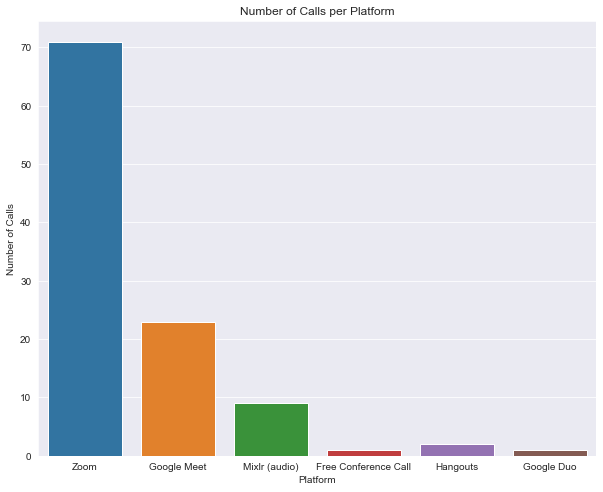

In [229]:
plt.figure(figsize=(10,8))
sns.countplot(df['Platform'])
plt.title('Number of Calls per Platform')
plt.ylabel('Number of Calls')
plt.savefig('Platform.png');

Based on this data, Zoom is the most widely used platform. Making 65% of the total.

## Calls per Date

In [50]:
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Date'].value_counts()

2020-07-21    5
2020-08-05    5
2020-08-26    4
2020-08-28    4
2020-09-16    4
2020-08-16    4
2020-08-09    4
2020-08-24    4
2020-09-14    3
2020-08-13    3
2020-07-28    3
2020-08-19    3
2020-07-08    3
2020-07-29    3
2020-07-15    3
2020-08-20    3
2020-08-18    3
2020-08-03    3
2020-07-25    3
2020-08-12    3
2020-07-27    2
2020-08-10    2
2020-08-06    2
2020-08-07    2
2020-09-13    2
2020-08-01    2
2020-08-02    2
2020-07-22    2
2020-08-25    2
2020-07-10    2
2020-09-11    1
2020-08-04    1
2020-09-09    1
2020-07-30    1
2020-09-05    1
2020-08-17    1
2020-08-08    1
2020-09-08    1
2020-09-12    1
2020-08-22    1
2020-09-10    1
2020-07-19    1
2020-09-07    1
2020-07-26    1
2020-09-04    1
2020-08-23    1
2020-08-15    1
Name: Date, dtype: int64

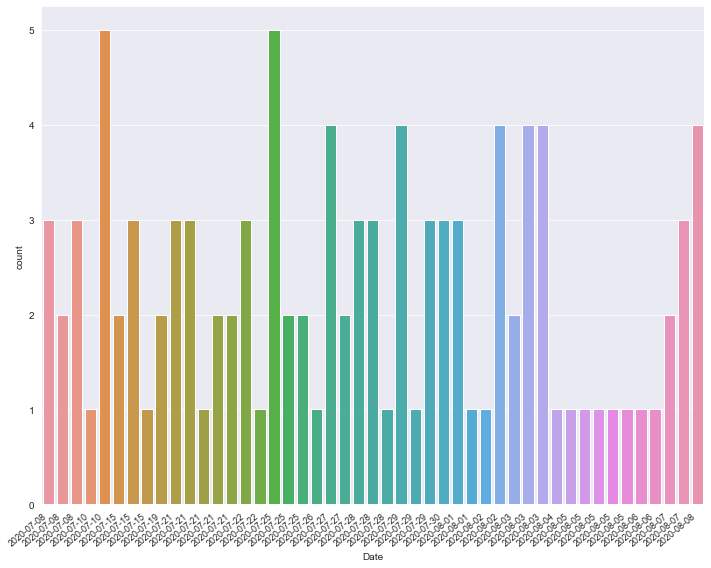

In [51]:
plt.figure(figsize=(10,8))
chart = sns.countplot(df['Date'])
chart.set_xticklabels(df['Date'], fontsize=9, rotation=40, ha='right')
plt.tight_layout();

### Calls per Weekday

In [14]:
df['Weekday'] = df['Date'].dt.weekday
df['Month'] = df['Date'].dt.month

In [15]:
df['Weekday'].value_counts()

2    31
0    16
6    15
1    15
5    10
4    10
3    10
Name: Weekday, dtype: int64

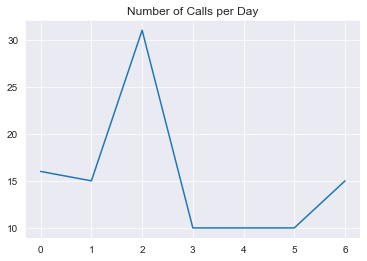

In [52]:
weekday_results = df.groupby('Weekday')['Date'].count()
plt.plot(weekday_results)
plt.title('Number of Calls per Day');

Most calls happen on Wednesdays and Mondays.

### Calls per month

In [18]:
df['Month'].value_counts()

8    61
7    29
9    17
Name: Month, dtype: int64

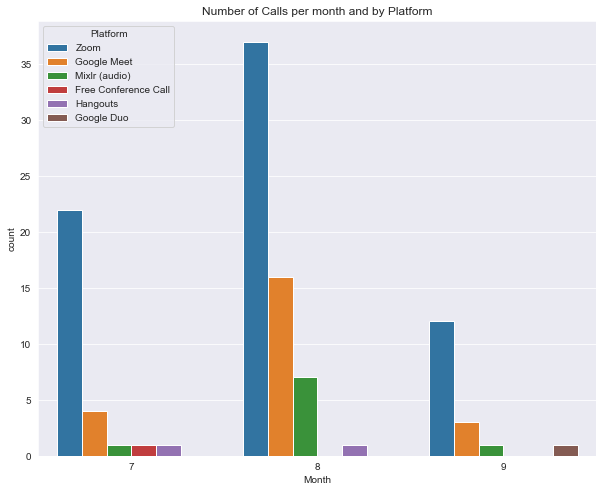

In [153]:
plt.figure(figsize=(10,8))
sns.countplot(x='Month', data=df, hue='Platform')
plt.title('Number of Calls per month and by Platform');

#### Add a column indicating if the call started in AM or PM

In [27]:
df['AM/PM'] = df['Start Time'].apply(lambda x: x.split(" ")[1])

In [28]:
df['AM/PM'].value_counts()

PM    60
AM    47
Name: AM/PM, dtype: int64

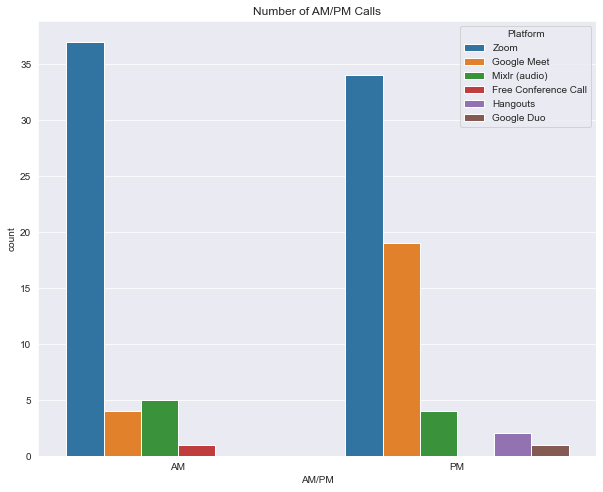

In [154]:
plt.figure(figsize=(10,8))
sns.countplot(x='AM/PM', data=df, hue='Platform')
plt.title('Number of AM/PM Calls');

Majority of the calls start in the PM

### Calls by Hour

In [39]:
df['Hour'] = pd.to_datetime(df['Start Time']).dt.hour

In [40]:
df['Hour'].value_counts()

12    26
11    20
10    16
9     10
22     6
13     5
20     4
19     3
18     3
17     3
15     3
23     2
21     2
16     2
14     1
1      1
Name: Hour, dtype: int64

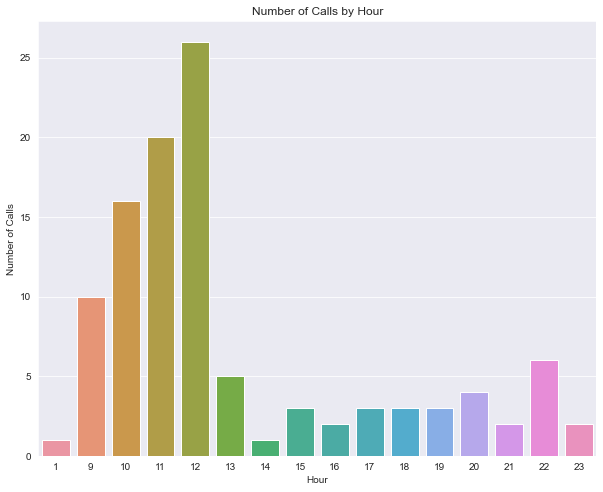

In [228]:
plt.figure(figsize=(10,8))
sns.countplot(x='Hour', data=df)
plt.title('Number of Calls by Hour')
plt.ylabel('Number of Calls')
plt.savefig('Calls-Hour.png');

Most calls occur from 9 AM to 12 NN

## Convert call duration into seconds

In [159]:
df['duration_min'] = (pd.to_datetime(df['Start Time'])) - (pd.to_datetime(df['End Time']))

In [160]:
df['duration_sec'] = df['duration_min'].dt.total_seconds()

In [84]:
def fix_time(x):
    if x < 0:
        return x * -1
    else:
        return x

In [162]:
df['duration_sec'] = df['duration_sec'].apply(lambda x: fix_time(x))

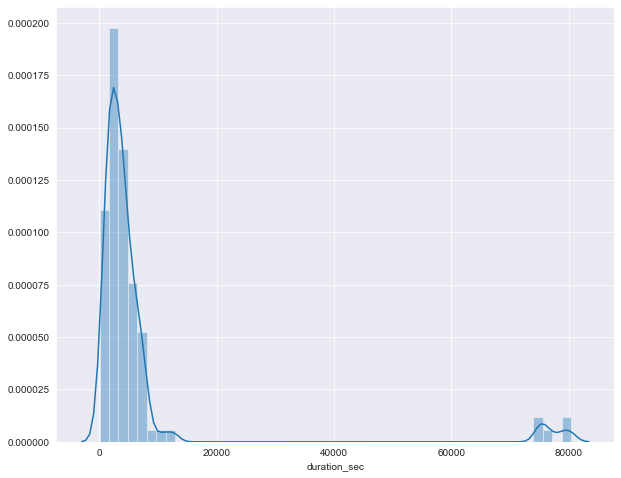

In [163]:
plt.figure(figsize=(10,8))
sns.distplot(df['duration_sec']);

In [164]:
df['duration_sec'].describe()

count      107.000000
mean      7062.056075
std      15775.796588
min         60.000000
25%       1920.000000
50%       3360.000000
75%       5220.000000
max      80400.000000
Name: duration_sec, dtype: float64

1. Majority of calls have a duration of less than 87 minutes or 5220 sec.
2. The average call duration is 117 minutes but this can be explained by the outliers with a duration above 1200 min.

## Participants' actions in calls 

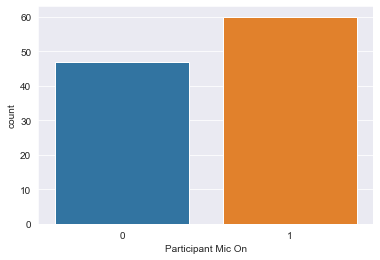

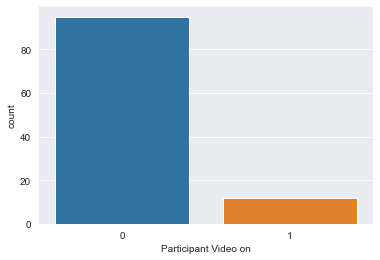

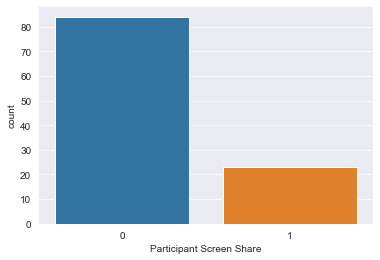

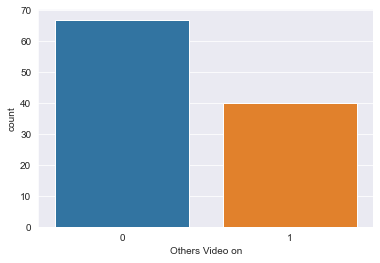

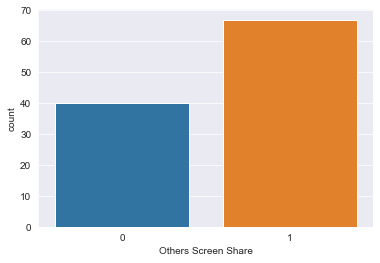

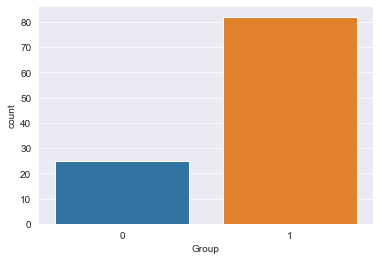

In [101]:
for col in df[['Participant Mic On', 'Participant Video on', 'Participant Screen Share',
               'Others Video on', 'Others Screen Share', 'Group']]:
    sns.countplot(df[col])
    plt.show();

1. Majority of calls are group calls
2. Majority have participants turning on their mic and other participants sharing screen

## Megabytes sent and transferred

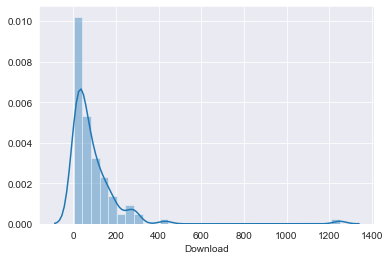

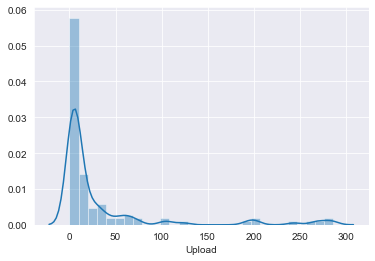

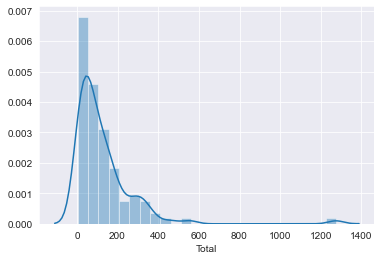

In [136]:
for col in df[['Download', 'Upload', 'Total']]:
    sns.distplot(df[col])
    plt.show();

In [138]:
for col in df[['Download', 'Upload', 'Total']]:
    print(df[col].describe());

count     107.000000
mean       92.609346
std       138.608018
min         2.600000
25%        23.250000
50%        54.200000
75%       120.700000
max      1250.000000
Name: Download, dtype: float64
count    107.000000
mean      33.577076
std       64.973816
min        0.006100
25%        3.450000
50%        7.500000
75%       27.450000
max      286.100000
Name: Upload, dtype: float64
count     107.000000
mean      126.280850
std       156.060906
min         3.600000
25%        37.850000
50%        79.000000
75%       160.350000
max      1274.800000
Name: Total, dtype: float64


1. Majority of Download bytes are below 120 megabytes
2. Majority of Upload bytes are below 27 megabytes
3. Majority of total bandwidth usages are below 160 megabytes

## Correlations with Total Bandwith Usage and Call duration

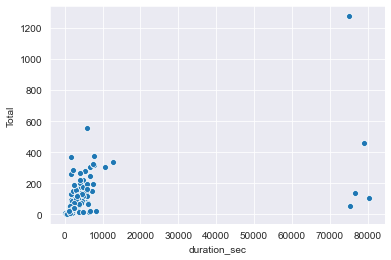

In [165]:
sns.scatterplot(x='duration_sec', y='Total', data=df);

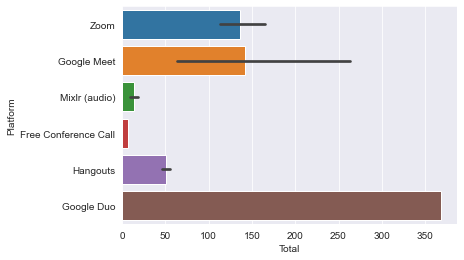

In [155]:
sns.barplot(y='Platform', x='Total', data=df);

In [171]:
for col in df[['Participant Mic On', 'Participant Video on', 'Participant Screen Share',
               'Others Video on', 'Others Screen Share', 'Group']]:
    print(df.groupby(col)['Total'].sum())

Participant Mic On
0    3712.851
1    9799.200
Name: Total, dtype: float64
Participant Video on
0    10433.951
1     3078.100
Name: Total, dtype: float64
Participant Screen Share
0    9342.051
1    4170.000
Name: Total, dtype: float64
Others Video on
0    5461.151
1    8050.900
Name: Total, dtype: float64
Others Screen Share
0     3399.851
1    10112.200
Name: Total, dtype: float64
Group
0     2498.451
1    11013.600
Name: Total, dtype: float64


In [218]:
def scatter_plot(x):
    chart = sns.scatterplot(x='duration_sec', y='Total', hue=x, data=df)
    chart.set_xlabel('Call Duration in Seconds')
    chart.set_ylabel('Bandwidth Usage in Megabytes')
    plt.title('Total Usage by Call Duration');

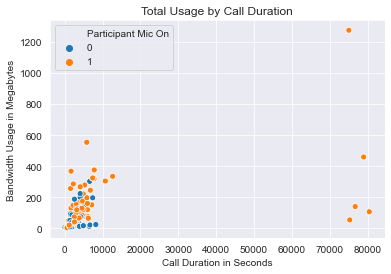

In [225]:
scatter_plot('Participant Mic On')
plt.savefig('Participant.png');

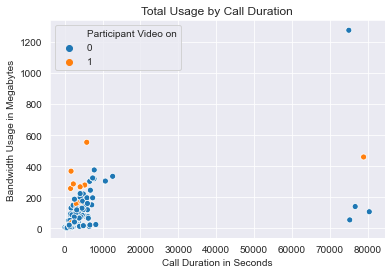

In [220]:
scatter_plot('Participant Video on')

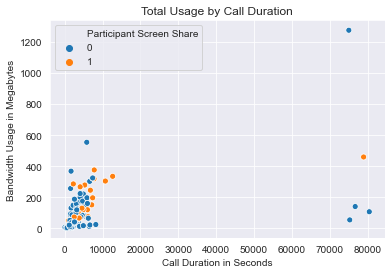

In [221]:
scatter_plot('Participant Screen Share')

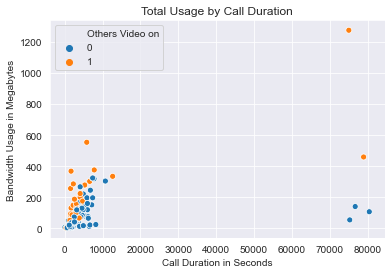

In [222]:
scatter_plot('Others Video on')

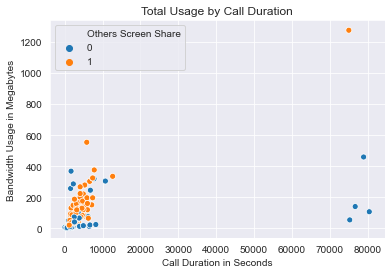

In [223]:
scatter_plot('Others Screen Share')

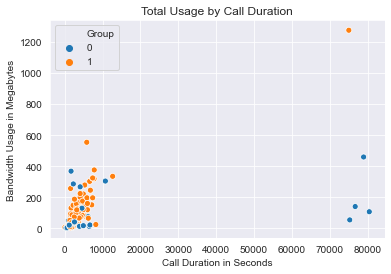

In [224]:
scatter_plot('Group')
plt.savefig('Group.png');

Based on the data:
1. Positive correlation between the duration of calls and the total bandwidth usage.
2. Calls that have participants that turn on their mic, others that share screen, and are classified as group calls have a higher probability of having a longer call duration and more total bandwidth usage.
3. Total Bandwidth usage by platform has a lot of variation, so this needs more data to verify.

#### Do calls have a longer duration in the AM or PM?

In [105]:
df.groupby('AM/PM')['duration_min'].sum()

AM/PM
AM    3057.0
PM    9537.0
Name: duration_min, dtype: float64

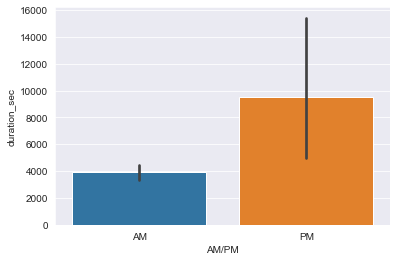

In [167]:
sns.barplot(x="AM/PM", y='duration_sec', data=df);

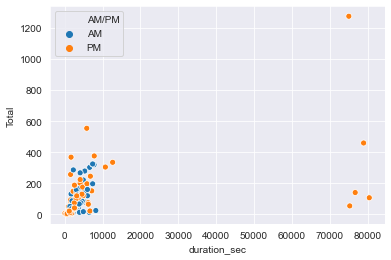

In [192]:
scatter_plot('AM/PM')

Based on the sum, calls have a longer duration in the PM, but this can be explained by how there were also more calls in the PM.

Note that the barplot has a large error bar, and so there is a lot of variation in the data.